In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as LR



In [49]:
df = pd.read_csv("IMDb Movies India.csv",encoding='ISO-8859-1')
chunks = [df[i:i + 5000] for i in range(0, len(df), 5000)]


for i, chunk in enumerate(chunks):
    chunk.to_csv('movie_rate.csv'.format(i), index=False)
    
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [3]:
df.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [4]:
df.shape

(15509, 10)

In [5]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [6]:
df.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [7]:
df.isnull()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,False,True,True,False,True,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
15504,False,False,True,False,False,False,False,False,False,False
15505,False,False,False,False,False,False,False,False,False,False
15506,False,False,True,False,True,True,False,False,True,True
15507,False,False,True,False,True,True,True,True,True,True


In [8]:
df['Rating'].isnull()

0         True
1        False
2         True
3        False
4         True
         ...  
15504    False
15505    False
15506     True
15507     True
15508    False
Name: Rating, Length: 15509, dtype: bool

In [9]:
df['Rating'].value_counts()

Rating
6.2     269
6.8     264
6.5     254
6.6     239
6.7     227
       ... 
9.6       1
1.4       1
9.7       1
10.0      1
1.1       1
Name: count, Length: 84, dtype: int64

In [10]:
df['Director'].value_counts()

Director
Jayant Desai        58
Kanti Shah          57
Babubhai Mistry     50
Mahesh Bhatt        48
Master Bhagwan      47
                    ..
Naeem Siddiqui       1
Shadaab Khan         1
Mystelle Brabbee     1
Kunal Shivdasani     1
Kiran Thej           1
Name: count, Length: 5938, dtype: int64

In [11]:
df['Genre'].value_counts()

Genre
Drama                         2780
Action                        1289
Thriller                       779
Romance                        708
Drama, Romance                 524
                              ... 
Action, Musical, War             1
Horror, Crime, Thriller          1
Animation, Comedy                1
Romance, Action, Crime           1
Adventure, Fantasy, Sci-Fi       1
Name: count, Length: 485, dtype: int64

In [12]:
df.dropna(inplace=True)
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [13]:
df.isna().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [14]:
df1 = pd.read_csv("movie_rate.csv")
df1.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,War Chhod Na Yaar,(2013),119 min,"Comedy, War",5.4,936,Faraz Haider,Sharman Joshi,Soha Ali Khan,Javed Jaffrey
1,Wardat,(1981),133 min,"Action, Thriller",6.8,51,Ravikant Nagaich,Mithun Chakraborty,Kaajal Kiran,Shakti Kapoor
2,Waris,(1969),NaN,"Comedy, Drama",5.9,48,Ramanna,Jeetendra,Hema Malini,Prem Chopra
3,Waris,(1954),122 min,"Drama, Family",6.4,9,Nitin Bose,Talat Mahmood,Suraiya,Nadira
4,Warning,(2013),109 min,"Adventure, Thriller",4.6,236,Gurmmeet Singh,Vishal Chaturvedi,Santosh Barmola,Jitin Gulati


In [15]:
df1.shape

(509, 10)

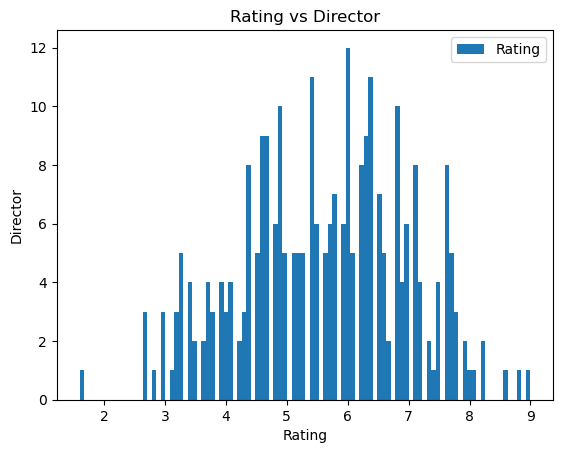

In [19]:
df1.plot.hist(bins=100)
plt.xlabel('Rating')
plt.ylabel('Director')
plt.title('Rating vs Director')
plt.show()

c:\Users\ardhe\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


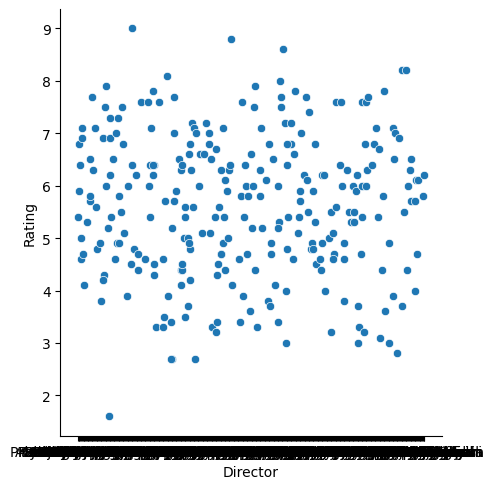

In [17]:
sns.relplot(x='Director',y='Rating',data = df1)

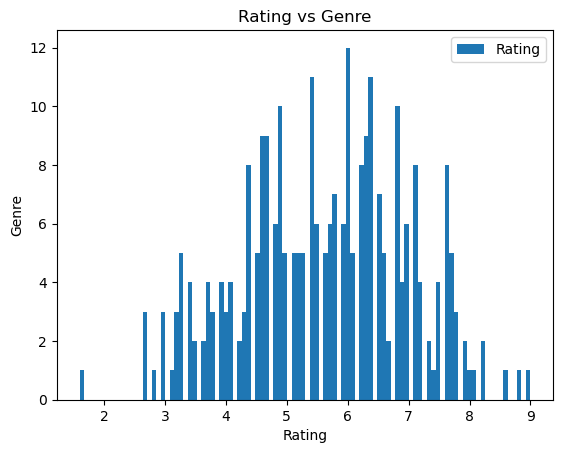

In [18]:
df1.plot.hist(bins=100)
plt.xlabel('Rating')
plt.ylabel('Genre')
plt.title('Rating vs Genre')
plt.show()

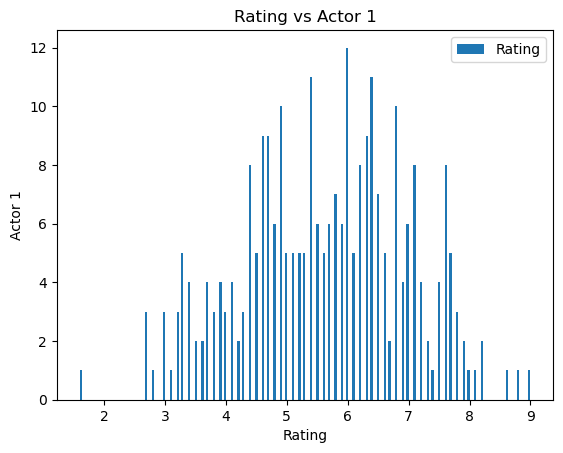

In [21]:
df1.plot.hist(bins=200)
plt.xlabel('Rating')
plt.ylabel('Actor 1')
plt.title('Rating vs Actor 1')
plt.show()

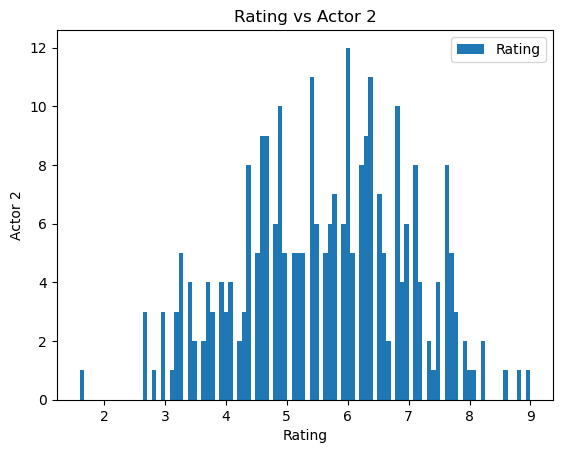

In [22]:
df1.plot.hist(bins=100)
plt.xlabel('Rating')
plt.ylabel('Actor 2')
plt.title('Rating vs Actor 2')
plt.show()

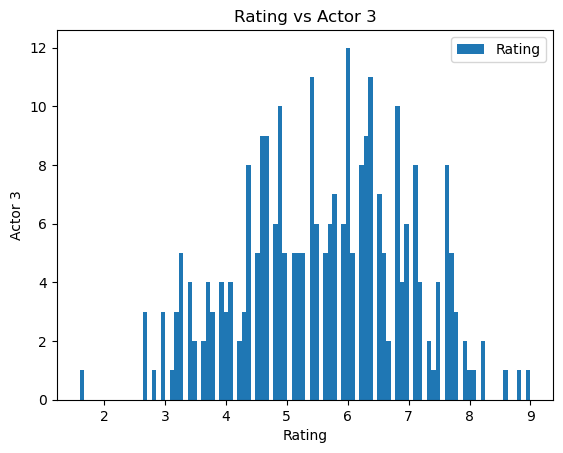

In [23]:
df1.plot.hist(bins=100)
plt.xlabel('Rating')
plt.ylabel('Actor 3')
plt.title('Rating vs Actor 3')
plt.show()

<Axes: xlabel='Rating', ylabel='count'>

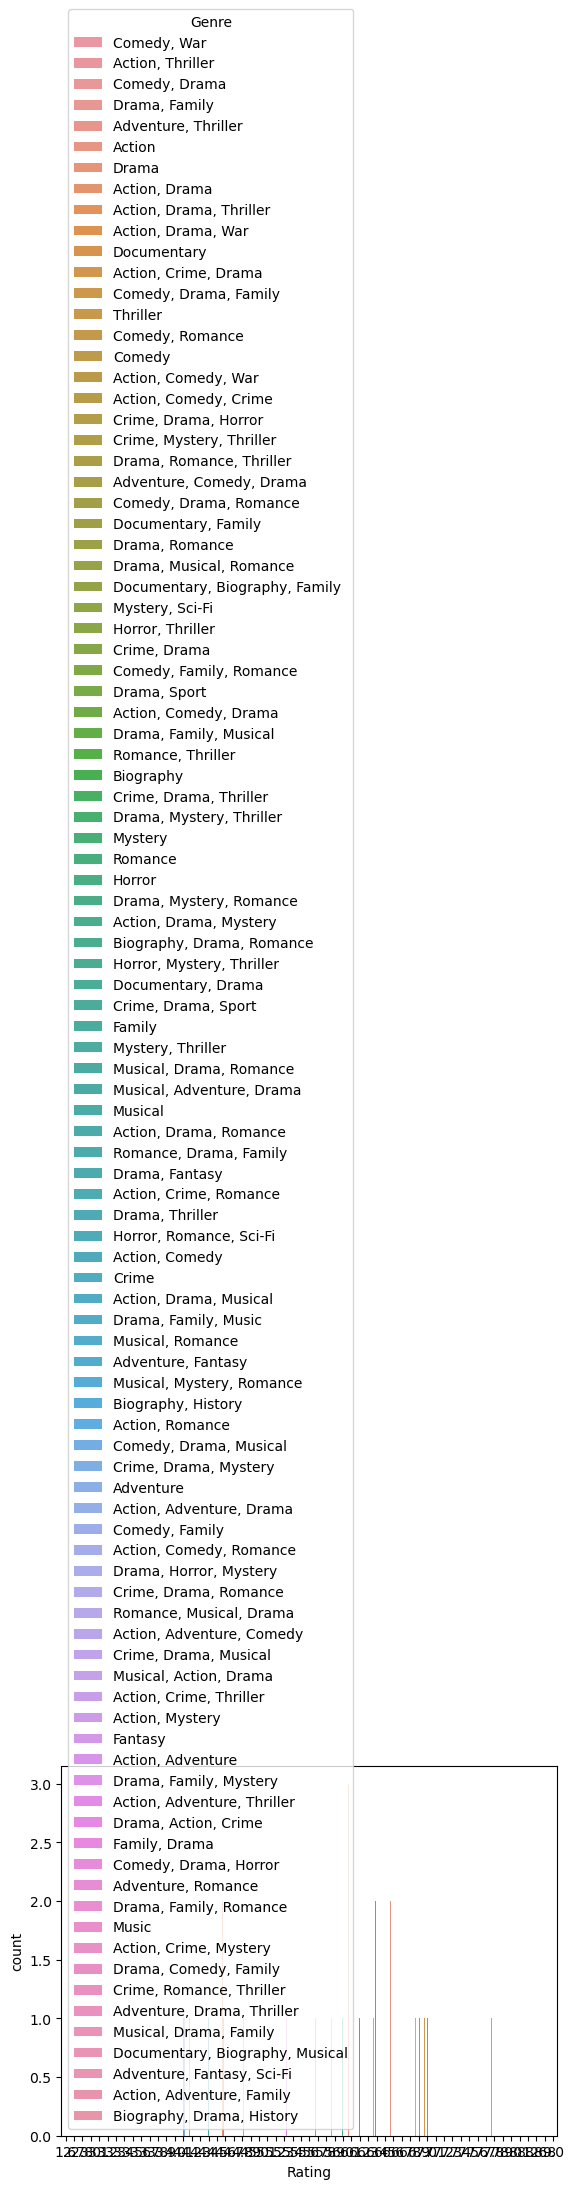

In [29]:
sns.countplot(x = df1['Rating'],hue = df1['Genre'])


In [30]:
df1['Rating']

0      5.4
1      6.8
2      5.9
3      6.4
4      4.6
      ... 
504    4.6
505    4.5
506    NaN
507    NaN
508    6.2
Name: Rating, Length: 509, dtype: float64

<Axes: xlabel='Rating', ylabel='count'>

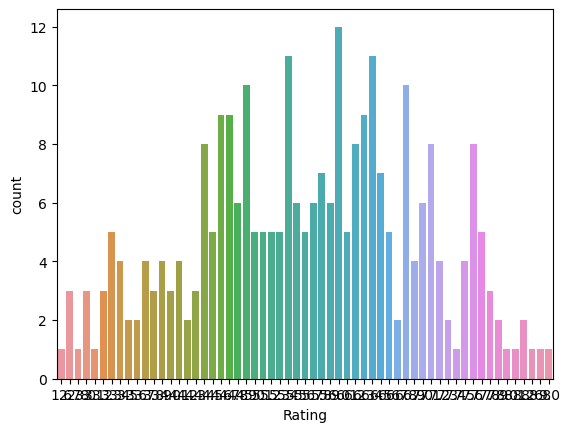

In [31]:
sns.countplot(x=df1['Rating'])

In [32]:
df1['Rating'].unique()

array([5.4, 6.8, 5.9, 6.4, 4.6, 7.1, 4.7, nan, 4.1, 5.7, 7.7, 6.3, 5.6,
       4.8, 4.9, 3.8, 6.9, 4.3, 4.2, 7.5, 6. , 7.9, 5.2, 1.6, 7.3, 6.5,
       5. , 7. , 5.8, 5.5, 5.1, 3.9, 4.5, 9. , 6.2, 4.4, 7.6, 3.3, 7.8,
       3.5, 8.1, 3.4, 2.7, 3.7, 6.6, 7.2, 6.7, 3.2, 6.1, 8.8, 3.6, 5.3,
       8. , 8.6, 3. , 7.4, 4. , 3.1, 2.8, 8.2])

In [34]:
le = LabelEncoder()
df1['Rating'] = le.fit_transform(df1['Rating'])
df1.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,War Chhod Na Yaar,(2013),119 min,"Comedy, War",27,936,Faraz Haider,Sharman Joshi,Soha Ali Khan,Javed Jaffrey
1,Wardat,(1981),133 min,"Action, Thriller",41,51,Ravikant Nagaich,Mithun Chakraborty,Kaajal Kiran,Shakti Kapoor
2,Waris,(1969),NaN,"Comedy, Drama",32,48,Ramanna,Jeetendra,Hema Malini,Prem Chopra
3,Waris,(1954),122 min,"Drama, Family",37,9,Nitin Bose,Talat Mahmood,Suraiya,Nadira
4,Warning,(2013),109 min,"Adventure, Thriller",19,236,Gurmmeet Singh,Vishal Chaturvedi,Santosh Barmola,Jitin Gulati


<Axes: xlabel='Rating', ylabel='count'>

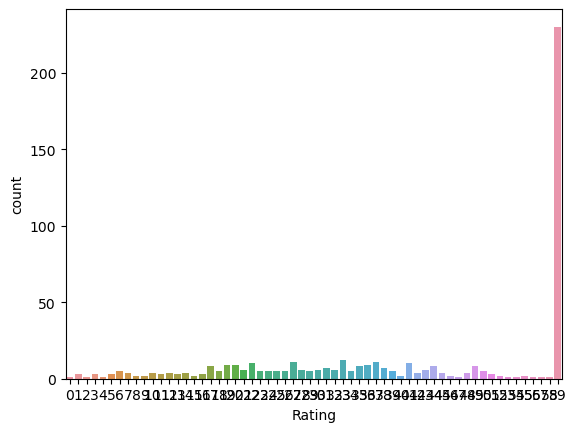

In [35]:
sns.countplot(x=df1['Rating'])

In [36]:
le = LabelEncoder()
df1['Director'] = le.fit_transform(df1['Director'])
df1.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,War Chhod Na Yaar,(2013),119 min,"Comedy, War",27,936,112,Sharman Joshi,Soha Ali Khan,Javed Jaffrey
1,Wardat,(1981),133 min,"Action, Thriller",41,51,308,Mithun Chakraborty,Kaajal Kiran,Shakti Kapoor
2,Waris,(1969),NaN,"Comedy, Drama",32,48,289,Jeetendra,Hema Malini,Prem Chopra
3,Waris,(1954),122 min,"Drama, Family",37,9,237,Talat Mahmood,Suraiya,Nadira
4,Warning,(2013),109 min,"Adventure, Thriller",19,236,123,Vishal Chaturvedi,Santosh Barmola,Jitin Gulati


In [38]:
df1['Rating'],df1['Director']

(0      27
 1      41
 2      32
 3      37
 4      19
        ..
 504    19
 505    18
 506    59
 507    59
 508    35
 Name: Rating, Length: 509, dtype: int64,
 0      112
 1      308
 2      289
 3      237
 4      123
       ... 
 504    198
 505    188
 506    183
 507    426
 508    168
 Name: Director, Length: 509, dtype: int32)

In [39]:
le = LabelEncoder()
df1['Actor 1'] = le.fit_transform(df1['Actor 1'])
df1.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,War Chhod Na Yaar,(2013),119 min,"Comedy, War",27,936,112,291,Soha Ali Khan,Javed Jaffrey
1,Wardat,(1981),133 min,"Action, Thriller",41,51,308,184,Kaajal Kiran,Shakti Kapoor
2,Waris,(1969),NaN,"Comedy, Drama",32,48,289,119,Hema Malini,Prem Chopra
3,Waris,(1954),122 min,"Drama, Family",37,9,237,322,Suraiya,Nadira
4,Warning,(2013),109 min,"Adventure, Thriller",19,236,123,351,Santosh Barmola,Jitin Gulati


In [40]:
le = LabelEncoder()
df1['Genre'] = le.fit_transform(df1['Genre'])
df1.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,War Chhod Na Yaar,(2013),119 min,44,27,936,112,291,Soha Ali Khan,Javed Jaffrey
1,Wardat,(1981),133 min,23,41,51,308,184,Kaajal Kiran,Shakti Kapoor
2,Waris,(1969),NaN,36,32,48,289,119,Hema Malini,Prem Chopra
3,Waris,(1954),122 min,63,37,9,237,322,Suraiya,Nadira
4,Warning,(2013),109 min,30,19,236,123,351,Santosh Barmola,Jitin Gulati


In [42]:
le = LabelEncoder()
df1['Actor 2'] = le.fit_transform(df1['Actor 2'])
df1.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,War Chhod Na Yaar,(2013),119 min,44,27,936,112,291,312,124
1,Wardat,(1981),133 min,23,41,51,308,184,125,297
2,Waris,(1969),NaN,36,32,48,289,119,97,230
3,Waris,(1954),122 min,63,37,9,237,322,326,194
4,Warning,(2013),109 min,30,19,236,123,351,280,128


In [41]:
le = LabelEncoder()
df1['Actor 3'] = le.fit_transform(df1['Actor 3'])
df1.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,War Chhod Na Yaar,(2013),119 min,44,27,936,112,291,Soha Ali Khan,124
1,Wardat,(1981),133 min,23,41,51,308,184,Kaajal Kiran,297
2,Waris,(1969),NaN,36,32,48,289,119,Hema Malini,230
3,Waris,(1954),122 min,63,37,9,237,322,Suraiya,194
4,Warning,(2013),109 min,30,19,236,123,351,Santosh Barmola,128


In [43]:
df1.groupby('Rating')[('Director')].mean()

Rating
0      75.000000
1     165.000000
2     382.000000
3     301.333333
4     132.000000
5     167.666667
6     209.800000
7     221.250000
8     301.500000
9     169.500000
10    275.750000
11     57.666667
12    216.000000
13    338.333333
14    250.250000
15     35.000000
16    188.333333
17    245.875000
18    183.400000
19    161.444444
20    151.222222
21    198.000000
22    256.200000
23    245.600000
24    148.600000
25    197.800000
26    200.600000
27    194.727273
28    180.666667
29    284.400000
30    281.500000
31    290.000000
32    163.833333
33    234.833333
34    204.200000
35    206.000000
36    304.111111
37    199.909091
38    274.714286
39    249.000000
40    110.500000
41    175.200000
42    238.250000
43    188.166667
44    224.625000
45     98.500000
46    364.500000
47    202.000000
48    268.000000
49    245.875000
50    190.200000
51    202.666667
52    209.000000
53     82.000000
54    388.000000
55    379.500000
56      8.000000
57    179.000000
58     

In [47]:
df1.groupby('Rating')[('Actor 1')].mean()

Rating
0     262.000000
1     191.333333
2     336.000000
3      56.666667
4     251.000000
5     176.333333
6     218.400000
7     168.750000
8     189.000000
9      91.000000
10    199.750000
11    116.666667
12    195.750000
13    135.333333
14    208.750000
15    121.500000
16    164.666667
17    186.125000
18    124.000000
19    195.333333
20    186.222222
21    122.833333
22    164.900000
23    136.800000
24     95.600000
25    176.800000
26    136.800000
27    205.727273
28    208.666667
29    178.000000
30    276.166667
31    214.714286
32    185.666667
33    168.833333
34    221.800000
35    183.875000
36    262.111111
37    256.181818
38    184.000000
39    174.400000
40    130.500000
41    199.300000
42    170.000000
43    171.333333
44    168.375000
45    230.750000
46    169.000000
47      9.000000
48    241.500000
49    163.875000
50    168.800000
51    163.000000
52     31.000000
53    332.000000
54    263.000000
55    125.000000
56    226.000000
57    333.000000
58    2

In [46]:
df1.groupby('Rating')[('Actor 2')].mean()

Rating
0     108.000000
1     206.666667
2      86.000000
3     127.000000
4     323.000000
5     173.333333
6     190.600000
7     241.500000
8     254.000000
9     342.500000
10    278.250000
11    215.333333
12    129.000000
13    121.333333
14    108.750000
15    136.500000
16    185.000000
17    239.875000
18    240.400000
19    250.888889
20    174.000000
21     66.333333
22    191.000000
23    176.200000
24    153.400000
25    214.400000
26    143.000000
27    221.363636
28    218.333333
29    255.400000
30    199.000000
31    226.285714
32    172.000000
33    170.666667
34    195.800000
35    155.875000
36    174.222222
37    245.454545
38    254.428571
39    291.400000
40    171.500000
41    173.900000
42     89.750000
43    227.166667
44    193.875000
45    213.750000
46    110.500000
47      3.000000
48    282.500000
49    192.250000
50     69.800000
51    230.333333
52    245.500000
53    303.000000
54    173.000000
55     48.500000
56      1.000000
57     32.000000
58     

In [45]:
df1.groupby('Rating')[('Actor 3')].mean()

Rating
0     316.000000
1     213.666667
2      81.000000
3     129.333333
4     112.000000
5     205.000000
6     108.600000
7     185.500000
8     266.500000
9     195.500000
10    191.500000
11    294.333333
12    128.250000
13    187.666667
14    233.000000
15    163.000000
16    124.333333
17    199.625000
18    111.600000
19    199.111111
20    167.555556
21    154.166667
22    188.400000
23    150.400000
24     99.600000
25    161.200000
26    189.400000
27    160.454545
28    170.333333
29    163.600000
30    210.000000
31    191.285714
32    211.833333
33    249.333333
34    140.800000
35    166.125000
36    204.111111
37    162.909091
38    200.857143
39    165.200000
40    279.500000
41    192.700000
42    191.500000
43    169.000000
44    202.250000
45    113.000000
46    149.000000
47    258.000000
48    265.250000
49    217.375000
50    171.400000
51    139.000000
52    192.000000
53    277.000000
54    312.000000
55     24.500000
56     18.000000
57    336.000000
58     

In [44]:
df1.groupby('Rating')[('Genre')].mean()

Rating
0      36.000000
1      69.333333
2      95.000000
3      73.000000
4     100.000000
5      19.000000
6      74.200000
7      48.250000
8      37.000000
9      25.000000
10     30.250000
11     50.333333
12     77.500000
13     31.666667
14     42.500000
15     12.500000
16     17.000000
17     54.750000
18     35.200000
19     43.666667
20     45.888889
21     52.166667
22     33.000000
23     49.800000
24     72.600000
25     56.400000
26     27.400000
27     49.181818
28     42.500000
29     34.000000
30     40.166667
31     30.428571
32     43.833333
33     36.583333
34     50.400000
35     43.875000
36     46.444444
37     42.636364
38     67.714286
39     31.600000
40     61.000000
41     55.200000
42     66.250000
43     33.833333
44     45.750000
45     55.500000
46     52.500000
47     19.000000
48     49.000000
49     53.000000
50     50.000000
51     37.000000
52     60.000000
53     74.000000
54     55.000000
55     46.500000
56     35.000000
57     60.000000
58     

In [50]:
scale = StandardScaler()
x = df1[['Rating','Director']]
scaled_x = scale.fit_transform(x)
print(scaled_x)

[[-0.87642404 -0.86638411]
 [-0.09202342  0.67517975]
 [-0.59628096  0.52574244]
 ...
 [ 0.91649166 -0.30796046]
 [ 0.91649166  1.60326412]
 [-0.42819512 -0.42593729]]


In [54]:
scale = StandardScaler()
x = df1[['Rating','Actor 1']]
scaled_x = scale.fit_transform(x)
print(scaled_x)

[[-0.87642404  0.81674821]
 [-0.09202342 -0.1282014 ]
 [-0.59628096 -0.70223621]
 ...
 [ 0.91649166  0.68427864]
 [ 0.91649166  1.39961433]
 [-0.42819512 -1.03782579]]


In [53]:
scale = StandardScaler()
x = df1[['Rating','Actor 2']]
scaled_x = scale.fit_transform(x)
print(scaled_x)

[[-0.87642404  0.85882232]
 [-0.09202342 -0.74314689]
 [-0.59628096 -0.98301394]
 ...
 [ 0.91649166  1.33855641]
 [ 0.91649166  1.33855641]
 [-0.42819512 -0.85451373]]


In [52]:
scale = StandardScaler()
x = df1[['Rating','Actor 3']]
scaled_x = scale.fit_transform(x)
print(scaled_x)

[[-0.87642404 -0.7379986 ]
 [-0.09202342  0.74685135]
 [-0.59628096  0.17179385]
 ...
 [ 0.91649166  1.27041115]
 [ 0.91649166  1.27041115]
 [-0.42819512 -1.44180031]]


In [51]:
scale = StandardScaler()
x = df1[['Rating','Genre']]
scaled_x = scale.fit_transform(x)
print(scaled_x)

[[-0.87642404 -0.31950062]
 [-0.09202342 -0.94913596]
 [-0.59628096 -0.5593617 ]
 ...
 [ 0.91649166 -1.63873658]
 [ 0.91649166 -1.63873658]
 [-0.42819512 -1.18899705]]


In [55]:
scale = StandardScaler()
x= df1[['Director','Genre']]
y = df1['Rating']
scaled_x = scale.fit_transform(x)
regr = linear_model.LinearRegression()
regr.fit(scaled_x,y)
scaled = scale.transform([[25,0]])
predicted_Rating = regr.predict([scaled[0]])
print(predicted_Rating)


[34.7443929]


c:\Users\ardhe\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [56]:
scale = StandardScaler()
x= df1[['Director','Actor 1']]
y = df1['Rating']
scaled_x = scale.fit_transform(x)
regr = linear_model.LinearRegression()
regr.fit(scaled_x,y)
scaled = scale.transform([[25,0]])
predicted_Rating = regr.predict([scaled[0]])
print(predicted_Rating)


[37.57603342]


c:\Users\ardhe\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [57]:
scale = StandardScaler()
x= df1[['Director','Actor 2']]
y = df1['Rating']
scaled_x = scale.fit_transform(x)
regr = linear_model.LinearRegression()
regr.fit(scaled_x,y)
scaled = scale.transform([[25,0]])
predicted_Rating = regr.predict([scaled[0]])
print(predicted_Rating)


[37.17854185]


c:\Users\ardhe\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [58]:
scale = StandardScaler()
x= df1[['Director','Actor 3']]
y = df1['Rating']
scaled_x = scale.fit_transform(x)
regr = linear_model.LinearRegression()
regr.fit(scaled_x,y)
scaled = scale.transform([[25,0]])
predicted_Rating = regr.predict([scaled[0]])
print(predicted_Rating)


[34.42327994]


c:\Users\ardhe\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [61]:
scale = StandardScaler()
x= df1[['Actor 1','Genre']]
y = df1['Rating']
scaled_x = scale.fit_transform(x)
regr = linear_model.LinearRegression()
regr.fit(scaled_x,y)
scaled = scale.transform([[25,0]])
predicted_Rating = regr.predict([scaled[0]])
print(predicted_Rating)


[33.04892263]


c:\Users\ardhe\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [60]:
scale = StandardScaler()
x= df1[['Actor 2','Genre']]
y = df1['Rating']
scaled_x = scale.fit_transform(x)
regr = linear_model.LinearRegression()
regr.fit(scaled_x,y)
scaled = scale.transform([[25,0]])
predicted_Rating = regr.predict([scaled[0]])
print(predicted_Rating)


[33.00674698]


c:\Users\ardhe\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [59]:
scale = StandardScaler()
x= df1[['Actor 3','Genre']]
y = df1['Rating']
scaled_x = scale.fit_transform(x)
regr = linear_model.LinearRegression()
regr.fit(scaled_x,y)
scaled = scale.transform([[25,0]])
predicted_Rating = regr.predict([scaled[0]])
print(predicted_Rating)


[30.65793374]


c:\Users\ardhe\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [62]:
x_director_genre = df1[['Director','Genre']]
y_rating = df1['Rating']

In [63]:
x_director_Actor1 = df1[['Director','Actor 1']]
y_rating = df1['Rating']

In [64]:
x_director_Actor2 = df1[['Director','Actor 2']]
y_rating = df1['Rating']

In [65]:
x_director_Actor3 = df1[['Director','Actor 3']]
y_rating = df1['Rating']

In [66]:
x_Actor1_genre = df1[['Actor 1','Genre']]
y_rating = df1['Rating']

In [67]:
x_Actor2_genre = df1[['Actor 2','Genre']]
y_rating = df1['Rating']

In [68]:
x_Actor3_genre = df1[['Actor 3','Genre']]
y_rating = df1['Rating']

In [69]:
x_train_director,x_test_director,y_train_genre,y_test_genre = train_test_split(x_director_genre,y_rating,test_size = 0.5,random_state = 0)

In [70]:
x_train_Actor1,x_test_Actor1,y_train_genre,y_test_genre = train_test_split(x_Actor1_genre,y_rating,test_size = 0.5,random_state = 0)

In [71]:
x_train_Actor2,x_test_Actor2,y_train_genre,y_test_genre = train_test_split(x_Actor2_genre,y_rating,test_size = 0.5,random_state = 0)

In [72]:
x_train_Actor3,x_test_Actor3,y_train_genre,y_test_genre = train_test_split(x_Actor3_genre,y_rating,test_size = 0.5,random_state = 0)

In [73]:
log = LR(random_state = 0)
log.fit(x_train_director,y_train_genre)


c:\Users\ardhe\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [74]:
log = LR(random_state = 0)
log.fit(x_train_Actor1,y_train_genre)


c:\Users\ardhe\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [75]:
log = LR(random_state = 0)
log.fit(x_train_Actor2,y_train_genre)


c:\Users\ardhe\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [76]:
log = LR(random_state = 0)
log.fit(x_train_Actor3,y_train_genre)


c:\Users\ardhe\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [88]:
x_test_director = np.array(x_test_director)
predicted_survival = print(log.predict(x_test_director))


[59 59 59 59 59 59 56 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59
  6 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59
 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59
 59 59 59 59 59 59 59 59 59 59 59 59 59  6 59 59 59 59 59 59 59 59 59 59
 59 59 59 59 59 59 59 59 59 59 59 59 59  6 59 59 59 59 59 59 59 59 59 59
 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59
 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59
 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59
 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59
 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59
 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59]


In [89]:
x_test_Actor1 = np.array(x_test_Actor1)
predicted_survival = print(log.predict(x_test_Actor1))


[59 59 56 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59
  6 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59
 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59
 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59
 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59
 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59
 59 59 59 56 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59
 59 59 59 59 59 59 59 56 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59
 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59
 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59
 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59]


In [90]:
x_test_Actor2 = np.array(x_test_Actor2)
predicted_survival = print(log.predict(x_test_Actor2))



[59 59 56 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59
 59 59 59 59 59 59 59 59 59 59 59 56 59 59 59 59 59 59 59 59 59 59 59 59
 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59
 59 59 59 59 59 59 59 59 59 59 59 59 59  6 59 59 59 59 59 59 59 59 59 59
 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59
 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59
 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59
 59 56 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59
 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59
 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59
 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59]


In [91]:
x_test_Actor3 = np.array(x_test_Actor3)
predicted_survival = print(log.predict(x_test_Actor3))




[59 59 59 59 59 59 59 59 59 59 59 59 56 59 59 59 59 59 59 59 59 59 59 59
 59  6 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59
 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 56 59 59 59 59 59 59
 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59
 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59  6 59 59 59
 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59
 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59
 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59
 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59
 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59
 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59]


In [80]:
print(x_test_director)
print(y_test_genre)

     Director  Genre
90        235    100
107       154     95
295       305     99
276        92     18
208        25     34
..        ...    ...
343       272     48
34         24      7
414       175     60
379       418    100
360       103     14

[255 rows x 2 columns]
90     59
107    59
295    21
276    14
208    59
       ..
343    35
34     15
414    59
379    59
360    59
Name: Rating, Length: 255, dtype: int64


In [82]:
print(x_test_Actor1)
print(y_test_genre)

     Actor 1  Genre
90       357    100
107      357     95
295        3     99
276        9     18
208       19     34
..       ...    ...
343      311     48
34       124      7
414      100     60
379      219    100
360      339     14

[255 rows x 2 columns]
90     59
107    59
295    21
276    14
208    59
       ..
343    35
34     15
414    59
379    59
360    59
Name: Rating, Length: 255, dtype: int64


In [83]:
print(x_test_Actor2)
print(y_test_genre)

     Actor 2  Genre
90       368    100
107      368     95
295        2     99
276      153     18
208      338     34
..       ...    ...
343       34     48
34        19      7
414      226     60
379      189    100
360      143     14

[255 rows x 2 columns]
90     59
107    59
295    21
276    14
208    59
       ..
343    35
34     15
414    59
379    59
360    59
Name: Rating, Length: 255, dtype: int64


In [84]:
print(x_test_Actor3)
print(y_test_genre)

     Actor 3  Genre
90       358    100
107      358     95
295       93     99
276      228     18
208      192     34
..       ...    ...
343      257     48
34       200      7
414      297     60
379      358    100
360       89     14

[255 rows x 2 columns]
90     59
107    59
295    21
276    14
208    59
       ..
343    35
34     15
414    59
379    59
360    59
Name: Rating, Length: 255, dtype: int64


In [92]:
print(y_train_Rating)

232    20
133    38
33     16
484    59
44     59
       ..
323    28
192    59
117    59
47     38
172    24
Name: Rating, Length: 254, dtype: int64


In [93]:
print(y_test_rating)

90     59
107    59
295    21
276    14
208    59
       ..
343    35
34     15
414    59
379    59
360    59
Name: Rating, Length: 255, dtype: int64
